## Libraries

`Importing the necessary libraries for the project`

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
import missingno as msn
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import kstest

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
pd.set_option("display.max_rows", None)

## Data

`The read_csv() of the pandas library is used to read the dataset "global air pollution dataset.csv"`

In [3]:
gap = pd.read_csv("global air pollution dataset.csv")

# Exploratory Data Analysis

`Let's take a look at the initial view of the dataset`

In [4]:
gap.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [5]:
gap.shape

(23463, 12)

In [6]:
gap.dtypes.value_counts()

object    7
int64     5
dtype: int64

`The dataset consists of 23,463 records and 12 features out of which 5 of them are Numerical and 7 are Categorical`

## About 

**`Country`**: Name of the country

**`City`**: Name of the city
<br><br>


**`Air quality index (AQI)`**

> An air quality index (AQI) indicates how polluted the air currently is or how polluted it is forecast to become.
<br><br>
> The AQI is calculated based on the levels of several air pollutants, including particulate matter (PM2.5 and PM10), ozone (O3), nitrogen dioxide (NO2), sulfur dioxide (SO2), and carbon monoxide (CO).

**`AQI Category`**: Overall AQI category of the city with respect to CO, Ozone, NO2, PM2.5
<br><br>

**`CO AQI`**

> CO AQI specifically refers to the Air Quality Index value calculated based on the levels of carbon monoxide in the air.<br><br>
> Carbon monoxide is a poisonous gas that is emitted by vehicles, generators, and other combustion sources.<br><br>Carbon Monoxide is a colorless and odorless gas.<br><br>Outdoor, it is emitted in the air above all by cars, trucks and other vehicles or machineries that burn fossil fuels.<br><br>Such items like kerosene and gas space heaters, gas stoves also release CO affecting indoor air quality.

**`CO AQI Value`**: AQI value of Carbon Monoxide of the city
<br><br>

**`Ozone AQI`**

> Ozone AQI refers to the Air Quality Index value calculated based on the levels of ozone (O3) in the air.<br><br>
> Ozone is a highly reactive gas that is created by the interaction of sunlight with pollutants emitted by vehicles, industrial processes, and other sources.<br><br>
> Furthermore it can reduce lung function and worsen bronchitis, emphysema, and asthma. Ozone affects also vegetation and ecosystems.<br><br>
> In particular, it damages sensitive vegetation during the growing season.

**`Ozone AQI Value`**: AQI value of Ozone of the city
<br>
<br>
<br>

**`NO2 AQI`**

> NO2 AQI refers to the Air Quality Index value calculated based on the levels of nitrogen dioxide (NO2) in the air.<br><br>
> Nitrogen dioxide is a highly reactive gas that is emitted by vehicles, power plants, and other combustion sources.<br><br>
> Exposure over short periods can aggravate respiratory diseases, like asthma.<br><br>
> Longer exposures may contribute to develoment of asthma and respiratory infections.<br><br>
> People with asthma, children and the elderly are at greater risk for the health effects of NO2.<br><br>

**`NO2 AQI Value`**: AQI value of Nitrogen Dioxide of the city
<br>
<br>
<br>

**`PM2.5`**

> Atmospheric Particulate Matter, also known as atmospheric aerosol particles, are complex mixtures of small solid and liquid matter that get into the air.<br><br>
> If inhaled they can cause serious heart and lungs problem.<br><br>
> They have been classified as **Group 1 Carcinogen by the International Agengy for Research on Cancer (IARC)**.<br><br>
> It can come from a variety of sources, including vehicle exhaust, **power plants**, wildfires, and dust.<br><br>
> PM2.5 refers to those particles with a diameter of 2.5 micrometers or less.

**`PM2.5 AQI Value`**: AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city

### AQI Value Indications

`Now let's take a look at the domain clases of AQI Category along with it's corresponding range`

`The AQI Value ranging:` 

> `0 to 50 - Good` 

> `51 to 100 - Moderate`

> `101 to 150 - Unhealthy for sensitive groups`

> `151 to 200 - Unhealthy`

> `201 to 300 - Very Unhealthy`

> `301 to 500 - Hazardous`

## Duplicates

In [7]:
# check for duplicate rows
dup = gap[gap.duplicated()]
dup

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category


`No duplicate rows are to found on the dataset`

## Missing Values

`Now let's check for missing values in the dataset`

In [8]:
# check for missing values
gap.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

`The dataset contains 0.2% of missing values which can lead to wrong inferences therefore imputation is necessary before proceeding into analysis`

In [9]:
print("Missing value count:")
print("--------------------")
print("Country: - 427")
print("City: - 1")

Missing value count:
--------------------
Country: - 427
City: - 1


`Most Countries has city names which are similar hence even if the missing values are manually imputed with the help of city names it may not be accurate enough and may deviate the course of analysis.`

`In the case of City it cannot be imputed as it is hard to find the city just by the name of the country`

`Another way is drop the records having missing values but this may affect the analysis if the data is smaller but since our 
current data is big enough rows are dropped.`


In [10]:
# dropping the records
gap.dropna(axis=0, how='any',inplace=True)

`Let's take a look at the new dimensions of the dataset after dropping the records`

In [11]:
# new dimension
new_dim = gap.shape
print("New dimensions of the Dataset: ", new_dim)
print("The Records got reduced from 23,463 to 23,035")

New dimensions of the Dataset:  (23035, 12)
The Records got reduced from 23,463 to 23,035


## Datatypes

`Ensuring whether all the features are assigned with proper datatypes`

In [12]:
# check for proper datatypes
gap.dtypes

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

## Formatting the Values

`Let's take a look at the Column 'Country' to inspect the values associated with it`

In [13]:
gap['Country'].unique()

array(['Russian Federation', 'Brazil', 'Italy', 'Poland', 'France',
       'United States of America', 'Germany', 'Belgium', 'Egypt', 'China',
       'Netherlands', 'India', 'Pakistan', 'Republic of North Macedonia',
       'Colombia', 'Romania', 'Indonesia', 'Finland', 'South Africa',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'Haiti', 'Somalia', 'Philippines',
       'Latvia', 'Chad', 'New Zealand', 'Tunisia', 'Viet Nam',
       'Iran (Islamic Republic of)', 'Mexico', 'Japan', 'El Salvador',
       'Bulgaria', 'Nigeria', 'South Sudan', 'Guatemala', 'Ireland',
       'Turkey', 'Peru', 'Democratic Republic of the Congo', 'Canada',
       'Switzerland', 'Denmark', 'Cameroon', 'Australia', 'Portugal',
       "Côte d'Ivoire", 'Sweden', 'Ethiopia', 'Thailand', 'Hungary',
       'Kazakhstan', 'Israel', 'Spain', 'Myanmar', 'Papua New Guinea',
       'Madagascar', 'Lithuania', 'Ghana', 'Azerbaijan', 'Armenia',
       'Ukraine', 'Malays

`Values of the column 'Country' are incorrect or is long hence it is essential to correct the Names of the Country and make it into a standardized form. e.g; Viet Nam which should be Vietnam`


`Changing the values of the column 'Country' into a proper format for analysis.`

> `Russian Federation -> Russia`

> `United States of America -> USA`

> `Republic of North Macedonia -> North Macedonia`

> `United Kingdom of Great Britain and Northern Ireland -> UK`

> `United Republic of Tanzania -> Tanzania`

> `Viet Nam -> Vietnam`

> `Iran (Islamic Republic of) -> Iran`

> `Côte d'Ivoire -> Ivory Coast`

> `Bolivia (Plurinational State of) -> Bolivia`

> `Venezuela (Bolivarian Republic of) -> Venezuela`

> `Kingdom of Eswatini -> Eswatini`

> `United Arab Emirates -> UAE`

> `Syrian Arab Republic -> Syria`

> `Lao People's Democratic Republic -> Laos`

> `Republic of Korea -> South Korea`

> `Republic of Moldova -> Moldova`

> `State of Palestine -> Palestine`

In [14]:
# renaming the columns
gap['Country'].replace({'Russian Federation': 'Russia','United States of America':'USA',
                        'Republic of North Macedonia':'North Macedonia',
                        'United Kingdom of Great Britain and Northern Ireland':'UK',
                        'United Republic of Tanzania':'Tanzania','Viet Nam':'Vietnam',
                        'Iran (Islamic Republic of)':'Iran',"Côte d'Ivoire":"Ivory Coast",
                        'Bolivia (Plurinational State of)':'Bolivia',
                        'Venezuela (Bolivarian Republic of)':'Venezuela','Kingdom of Eswatini':'Eswatini',
                        'United Arab Emirates':'UAE','Syrian Arab Republic':'Syria',
                        "Lao People's Democratic Republic":"Laos",'Republic of Korea':'South Korea',
                        'Republic of Moldova':'Moldova','State of Palestine':'Palestine'},inplace=True)

In [15]:
gap['Country'].unique()

array(['Russia', 'Brazil', 'Italy', 'Poland', 'France', 'USA', 'Germany',
       'Belgium', 'Egypt', 'China', 'Netherlands', 'India', 'Pakistan',
       'North Macedonia', 'Colombia', 'Romania', 'Indonesia', 'Finland',
       'South Africa', 'UK', 'Tanzania', 'Haiti', 'Somalia',
       'Philippines', 'Latvia', 'Chad', 'New Zealand', 'Tunisia',
       'Vietnam', 'Iran', 'Mexico', 'Japan', 'El Salvador', 'Bulgaria',
       'Nigeria', 'South Sudan', 'Guatemala', 'Ireland', 'Turkey', 'Peru',
       'Democratic Republic of the Congo', 'Canada', 'Switzerland',
       'Denmark', 'Cameroon', 'Australia', 'Portugal', 'Ivory Coast',
       'Sweden', 'Ethiopia', 'Thailand', 'Hungary', 'Kazakhstan',
       'Israel', 'Spain', 'Myanmar', 'Papua New Guinea', 'Madagascar',
       'Lithuania', 'Ghana', 'Azerbaijan', 'Armenia', 'Ukraine',
       'Malaysia', 'Serbia', 'Slovakia', 'Gambia', 'Ecuador',
       'Bosnia and Herzegovina', 'Czechia', 'Argentina',
       'Dominican Republic', 'Guinea', 'Bolivia'

`Unhealthy for Sensitive Groups -> Unhealthy (SG)`

`Renaming the domain value "Unhealthy for Sensitive Groups" to "Unhealthy(SG)" for the purpose of Visualization`

In [16]:
cols = ["AQI Category","CO AQI Category","Ozone AQI Category","NO2 AQI Category","PM2.5 AQI Category"]
for categ in cols:
    gap[categ].replace({'Unhealthy for Sensitive Groups':"Unhealthy(SG)"},inplace=True)

In [17]:
# gap.to_csv("global air pollution cleaned.csv")

## Descriptive Statistics

In [18]:
gap.describe().style.background_gradient(cmap = "Blues")

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23035.000000,23035.000000,23035.000000,23035.000000,23035.000000
mean,72.344693,1.376254,35.233905,3.084741,68.883482
std,56.360992,1.844926,28.236613,5.281708,55.057396
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,80.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


`Upon observing the min and max values everything seems to be in place such that the maximum AQI Value haven't exceeded above the threshold of 500.`

In [19]:
# pd.set_option("display.max_rows", None)

In [20]:
# gap["Country"].value_counts()

`histplot`

In [21]:
def hist(col_name):
    plt.figure(figsize=(8,5))
    sns.histplot(x=gap[col_name],bins=15,kde=True)
    title="{}".format(col_name)
    plt.title(title,fontsize=18)
    plt.xlabel(col_name,fontsize=12)
    plt.ylabel("Count",fontsize=12)

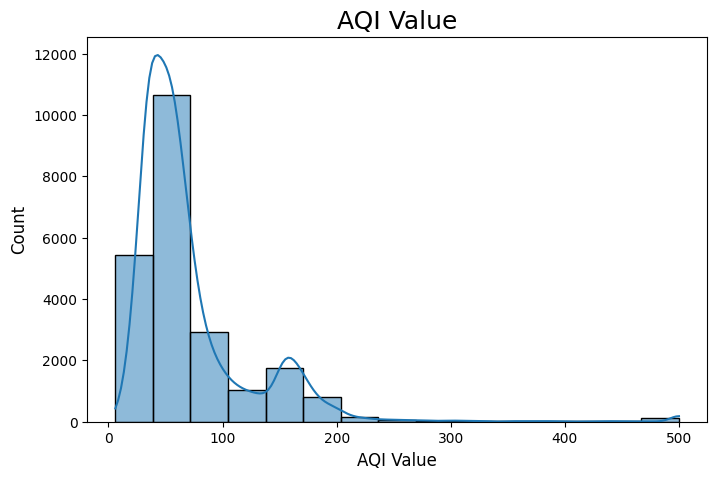

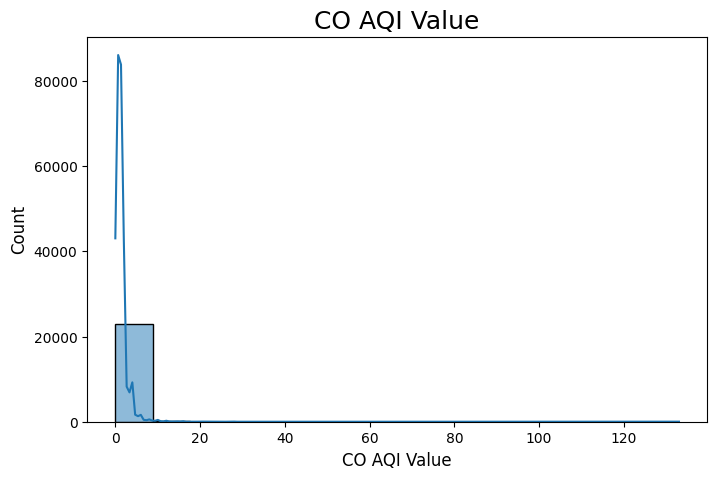

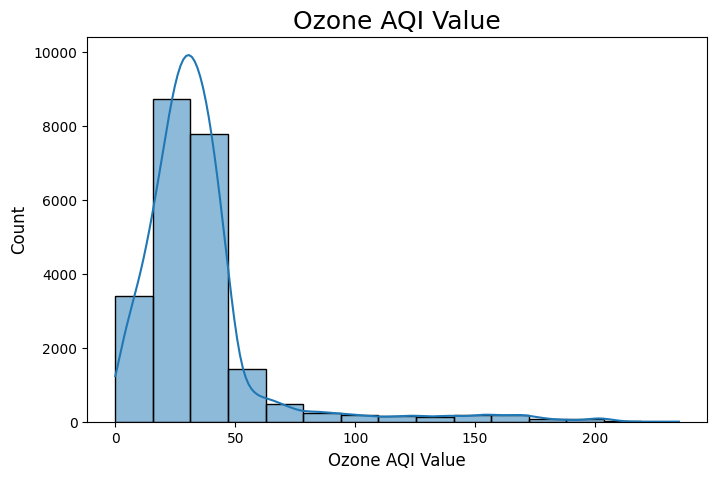

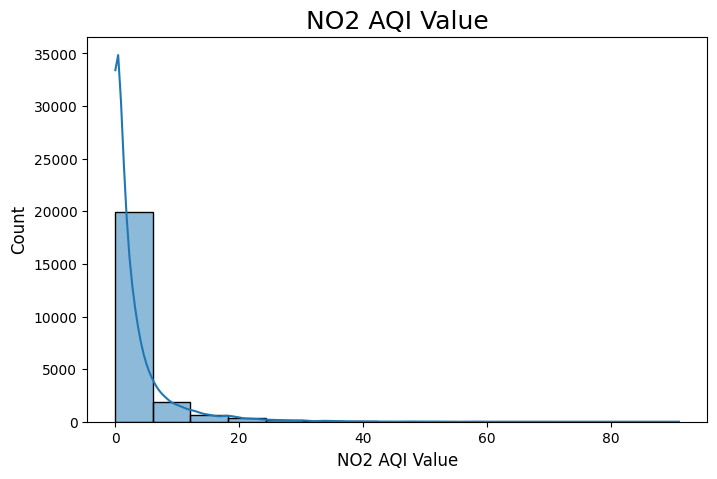

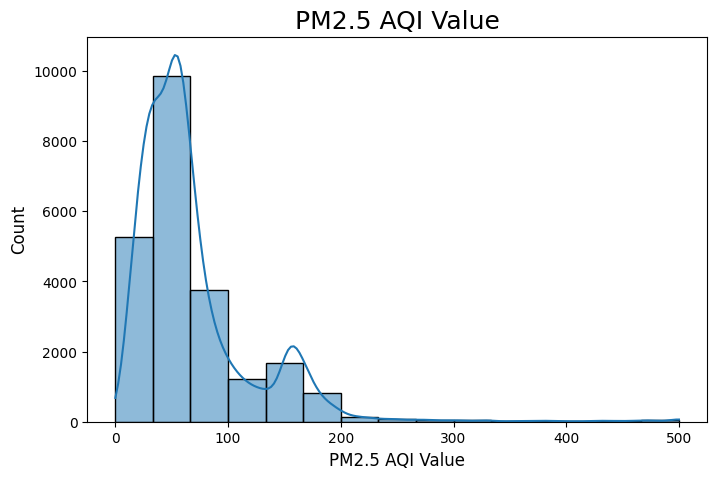

In [22]:
hist("AQI Value")
hist("CO AQI Value")
hist("Ozone AQI Value")
hist("NO2 AQI Value")
hist("PM2.5 AQI Value")

In [23]:
"""cols = ["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]
    for col in cols:
        plt.figure(figsize=(8,5))
        sns.distplot(x = gap[col])
        plt.title(col)"""

'cols = ["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]\n    for col in cols:\n        plt.figure(figsize=(8,5))\n        sns.distplot(x = gap[col])\n        plt.title(col)'

`Let's take a look at the distribution which is essential for understanding how the data is spread out`

In [24]:
"""def hist(col_name):
    plt.figure(figsize=(8,5))
    sns.histplot(x=gap[col_name],color="grey",bins=20,kde=True)
    title="{}".format(col_name)
    plt.title(title)"""

'def hist(col_name):\n    plt.figure(figsize=(8,5))\n    sns.histplot(x=gap[col_name],color="grey",bins=20,kde=True)\n    title="{}".format(col_name)\n    plt.title(title)'

`The Above plot represents positively skewed distributions hence most of them seems to reside on the lower end of the spectrum which indicates lower AQI which at present can be conluded as safer`

`Skewness in the distribution represents inequality among the data which will be difficult when training the model because better prediction will be done on these values`

## Category Count

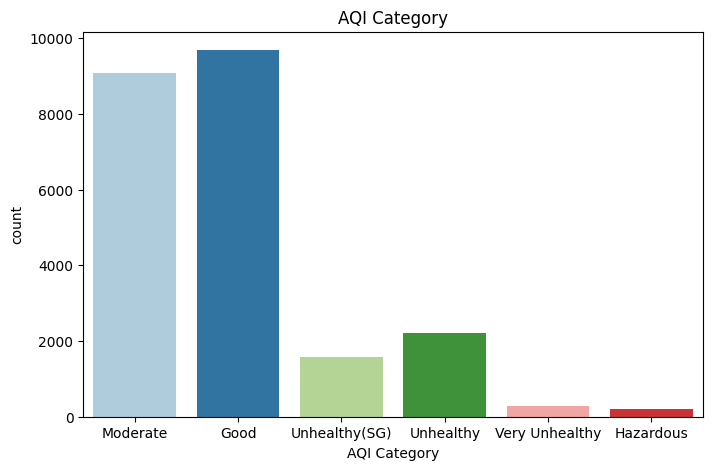

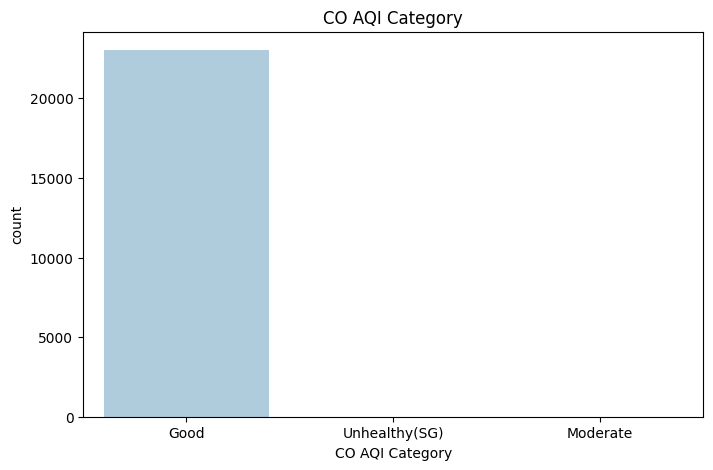

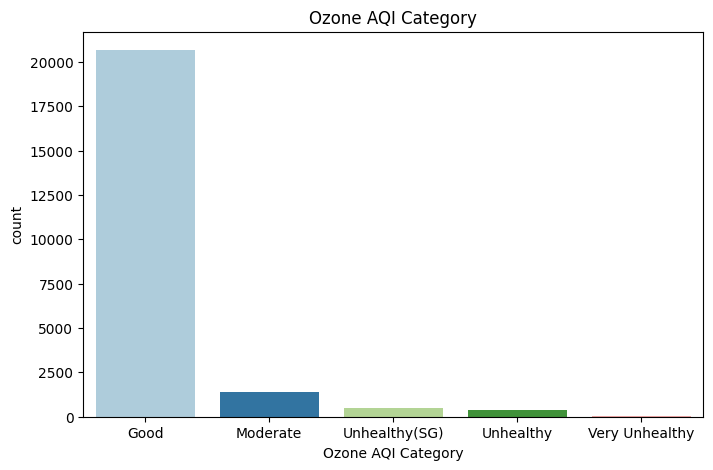

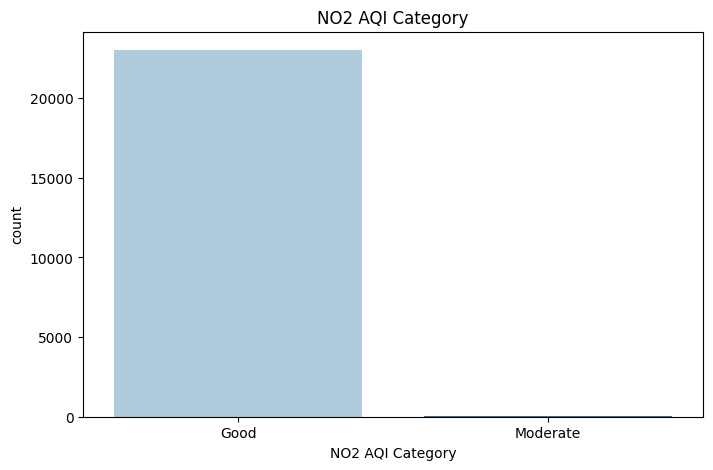

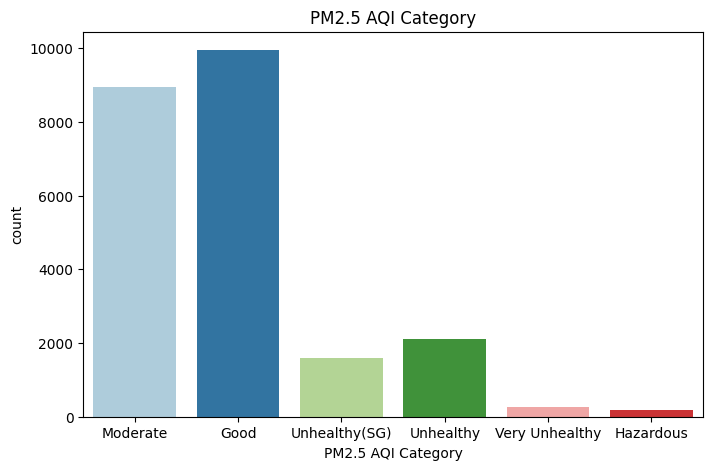

In [25]:
cols = ["AQI Category", "CO AQI Category", "Ozone AQI Category", "NO2 AQI Category", "PM2.5 AQI Category"]
for col in cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x = gap[col], palette = "Paired")
    plt.title(col)

`Since the dataset is of large a representative sample is to be taken for getting the feel of the data`

`Therefore let's take a look at the top 10 countries of the dataset on the basis of City Counts`

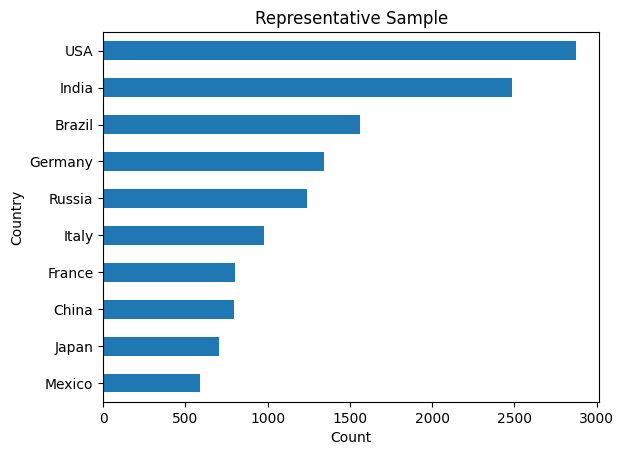

In [26]:
gap.groupby('Country')['AQI Category'].count().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh')
plt.title('Representative Sample',fontsize=12)
plt.xlabel('Count')
plt.show()

`Let's check for the correlation among the data`

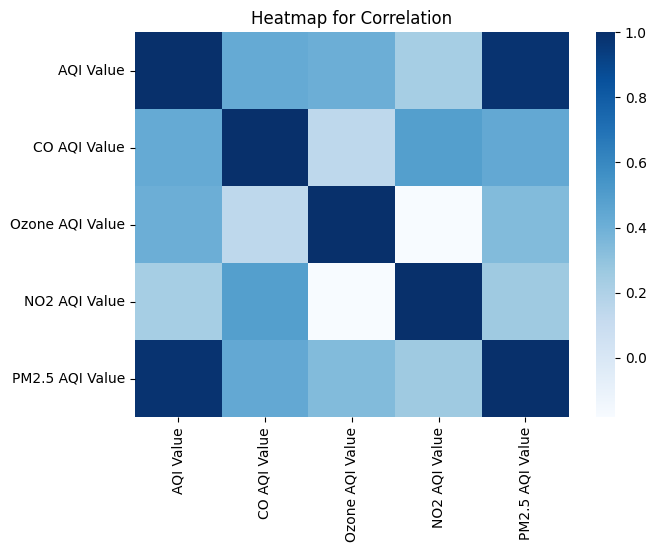

In [27]:
plt.figure(figsize=(7,5))
sns.heatmap(gap.corr(),cmap="Blues")
plt.title("Heatmap for Correlation",fontsize=12); 

`High correlation can be seen on AQI Value and PM2.5 Value which makes sense because the Concentration of Particular Matter in the Atmosphere plays an important role in the Overall AQI Value`

`CO AQI Value also seems to be a highly contributing factor to the overall Air Quality which is high likely due to the harmful gases emitted from the machines,vehicles etc.`

`Even though NO2 isn't a major factor when it comes to the AQI it is still harmful as it is responsible for the respiratory disease like asthma hence a slight concentration of NO2 is still a major concern.`

`Further analysis is to be done to ensure the effects of NO2 on the overall AQI Quality`

In [28]:
# Indian Cities with poor air quality 
gap[gap['Country'] == 'India'][['City', 'AQI Value']] \
        .groupby(['City']) \
        .agg('mean') \
        .sort_values('AQI Value', ascending=False) \
        .head(10) \
        .style \
        .background_gradient(cmap='viridis')

,AQI Value
City,
Nagaur,500.000000
Sisauli,500.000000
Fazilka,500.000000
Pokaran,500.000000
Faridnagar,500.000000
Faridabad,500.000000
Aonla,500.000000
Etah,500.000000
Didwana,500.000000


In [29]:
# which pollutant is responsible for poor air quality?
gap[gap['Country'] == 'India'] \
        .groupby(['City']) \
        .agg('mean') \
        .sort_values('AQI Value', ascending=False) \
        .head(10) \
        .style \
        .background_gradient(cmap='viridis')

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
City,,,,,
Nagaur,500.000000,0.000000,35.000000,0.000000,426.000000
Sisauli,500.000000,1.000000,47.000000,1.000000,500.000000
Fazilka,500.000000,1.000000,47.000000,1.000000,450.000000
Pokaran,500.000000,0.000000,37.000000,0.000000,500.000000
Faridnagar,500.000000,1.000000,45.000000,2.000000,496.000000
Faridabad,500.000000,1.000000,45.000000,2.000000,500.000000
Aonla,500.000000,4.000000,149.000000,4.000000,479.000000
Etah,500.000000,1.000000,50.000000,3.000000,437.000000
Didwana,500.000000,1.000000,37.000000,0.000000,334.000000


`PM2.5 plays is a major factor responsible for poor Air Quality level `

`Confirming the relationship using a scatterplot`

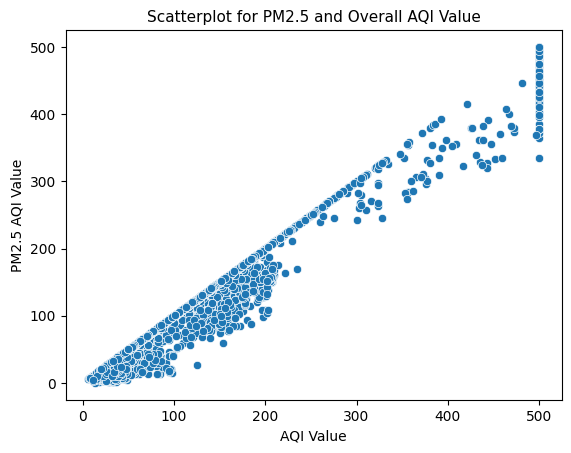

In [30]:
sns.scatterplot(x="AQI Value",y="PM2.5 AQI Value",data=gap);
plt.title("Scatterplot for PM2.5 and Overall AQI Value",fontsize=11);

`Positive correlation observed`

In [31]:
# Indian cities with good air quality
gap[gap['Country']=='India'][['City', 'AQI Value']] \
        .groupby(['City']) \
        .agg('mean') \
        .sort_values('AQI Value', ascending=True) \
        .head(10) \
        .style \
        .background_gradient(cmap='viridis')

,AQI Value
City,
Birur,21.000000
Thoubal,23.000000
Kargil,23.000000
Pandavapura,23.000000
Hindupur,24.000000
Ziro,24.000000
Kuppam,24.000000
Churachandpur,24.000000
Bagepalli,24.000000


In [32]:
# Air Quality Level of various pollutants 
gap[gap['Country'] == 'India'] \
        .groupby(['City']) \
        .agg('mean') \
        .sort_values('AQI Value', ascending=True) \
        .head(10) \
        .style \
        .background_gradient(cmap='viridis')

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
City,,,,,
Birur,21.000000,1.000000,21.000000,0.000000,18.000000
Thoubal,23.000000,1.000000,20.000000,0.000000,23.000000
Kargil,23.000000,1.000000,21.000000,0.000000,23.000000
Pandavapura,23.000000,1.000000,23.000000,0.000000,21.000000
Hindupur,24.000000,1.000000,24.000000,0.000000,21.000000
Ziro,24.000000,1.000000,22.000000,0.000000,24.000000
Kuppam,24.000000,1.000000,24.000000,0.000000,24.000000
Churachandpur,24.000000,1.000000,17.000000,0.000000,24.000000
Bagepalli,24.000000,1.000000,24.000000,0.000000,22.000000


In [33]:
# pollutant levels in developed countries (USA, UK)

In [34]:
gap[gap['Country'] == 'USA'] \
        .groupby(['City']) \
        .agg('mean') \
        .sort_values('AQI Value', ascending=False) \
        .head(10) \
        .style \
        .background_gradient(cmap='viridis')

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
City,,,,,
Durango,500.000000,133.000000,0.000000,53.000000,500.000000
Alpine,163.000000,5.000000,4.000000,25.000000,163.000000
Pembroke Pines,162.000000,6.000000,5.000000,18.000000,162.000000
Scott Lake,158.000000,6.000000,7.000000,17.000000,158.000000
Royal Oak,157.000000,5.000000,4.000000,29.000000,157.000000
Edinburg,156.000000,3.000000,15.000000,6.000000,156.000000
Inkster,154.000000,4.000000,7.000000,26.000000,154.000000
West Puente Valley,154.000000,4.000000,13.000000,25.000000,154.000000
Mission,154.000000,3.000000,15.000000,5.000000,154.000000


In [35]:
gap[gap['Country'] == 'UK'] \
        .groupby(['City']) \
        .agg('mean') \
        .sort_values('AQI Value', ascending=False) \
        .head(10) \
        .style \
        .background_gradient(cmap='viridis')

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
City,,,,,
Falmouth,78.000000,0.000000,37.000000,0.000000,78.000000
George Town,78.000000,1.000000,27.000000,0.000000,78.000000
Rhondda,74.000000,0.000000,32.000000,0.000000,74.000000
Southport,67.000000,0.000000,33.000000,0.000000,67.000000
Ivybridge,67.000000,0.000000,35.000000,1.000000,67.000000
Cardiff,67.000000,0.000000,33.000000,0.000000,67.000000
Formby,66.000000,0.000000,33.000000,0.000000,66.000000
Wrexham,66.000000,0.000000,33.000000,0.000000,66.000000
Preston,65.000000,0.000000,32.000000,1.000000,65.000000


## Mapping Countries to Continents

`Mapping Countries to their corresponding continents by creating a dataframe for each of them `

`Six Dataframes:`

> `asia`

> `north_america`

> `south_america`

> `europe`

> `africa`

> `australia`


`Even though some of the countries share their region among one or more continents they are taken in the following manner for the purpose of analysis`

> `Russia -> Europe (Asia and Europe)`

> `Turkey -> Asia (Asia and Europe)`

> `Kazakhstan -> Asia (Asia and Europe)`

> `Azerbaijan -> Asia (Asia and Europe)`

> `Georgia -> Europe (Asia and Europe)`

In [36]:
pd.set_option("display.max_rows", None)

In [39]:
asia = gap[gap["Country"].isin(["India","China","Japan","Indonesia","Philippines","Pakistan","Thailand","Iran","Malaysia",
                               "Bangladesh","Kazakhstan","Vietnam","Myanmar","Uzbekistan","Afghanistan","Israel","Sri Lanka",
                               "Azerbaijan","Nepal","Tajikistan","Armenia","Turkmenistan","Syria","Iraq","Saudi Arabia",
                               "Kyrgyzstan","Jordan","Cambodia","Mongolia","Laos","Yemen","Oman","Lebanon","Kuwait","UAE",
                               "Bhutan","Qatar","Palestine","Bahrain","Maldives","Singapore","South Korea"])]

In [40]:
north_america = gap[gap["Country"].isin(["USA","Mexico","Canada","Guatemala","Cuba","Dominican Republic","Costa Rica",
                                        "Nicaragua","El Salvador","Honduras","Panama","Haiti","Jamaica","Belize",
                                        "Saint Kitts and Nevis","Barbados","Saint Lucia"])]

In [41]:
south_america = gap[gap["Country"].isin(["Brazil","Colombia","Peru","Venezuela","Chile","Argentina","Ecuador",
                                        "Bolivia","Uruguay","Paraguay","Trinidad and Tobago","Guyana","Suriname",
                                        "Aruba"])]

In [42]:
europe = gap[gap["Country"].isin(["Germany","Russia","Italy","France","Spain","UK","Poland","Netherlands","Belgium",
                                 "Ukraine","Romania","Portugal","Hungary","Czechia","Switzerland","Greece","Sweden",
                                 "Serbia","Finland","Austria","Bulgaria","Slovakia","Denmark","North Macedonia","Lithuania",
                                 "Bosnia and Herzegovina","Albania","Ireland","Croatia","Moldova","Latvia","Belarus",
                                 "Norway","Georgia","Slovenia","Estonia","Malta","Cyprus","Montenegro","Iceland",
                                 "Andorra","Luxembourg","Monaco"])]

In [43]:
africa = gap[gap["Country"].isin(["Tanzania","South Africa","Nigeria","Ethiopia","Democratic Republic of the Congo",
                                 "Ivory Coast","Madagascar","Cameroon","Uganda","Kenya","Ghana","Tunisia","Zambia",
                                 "Egypt","Burkina Faso","Senegal","Chad","Central African Republic","Niger","Sudan",
                                 "Angola","Zimbabwe","Benin","Mali","Libya","Mozambique","Guinea","Malawi","Togo",
                                 "Botswana","Morocco","Somalia","Mauritius","Namibia","Sierra Leone","Burundi","Rwanda",
                                 "South Sudan","Congo","Algeria","Gabon","Liberia","Gambia","Lesotho","Eritrea",
                                 "Guinea-Bissau","Equatorial Guinea","Mauritania","Comoros","Eswatini","Cabo Verde",
                                 "Seychelles"])]

In [44]:
australia = gap[gap["Country"].isin(["Australia","New Zealand","Papua New Guinea","Palau","Vanuatu","Solomon Islands"])]

`As this is a large dataset a representative sample is to be taken for getting the feel of the data or to understand
what the data is trying to tell`

`Therefore the top representative countries are taken for analyzing based on various factors`

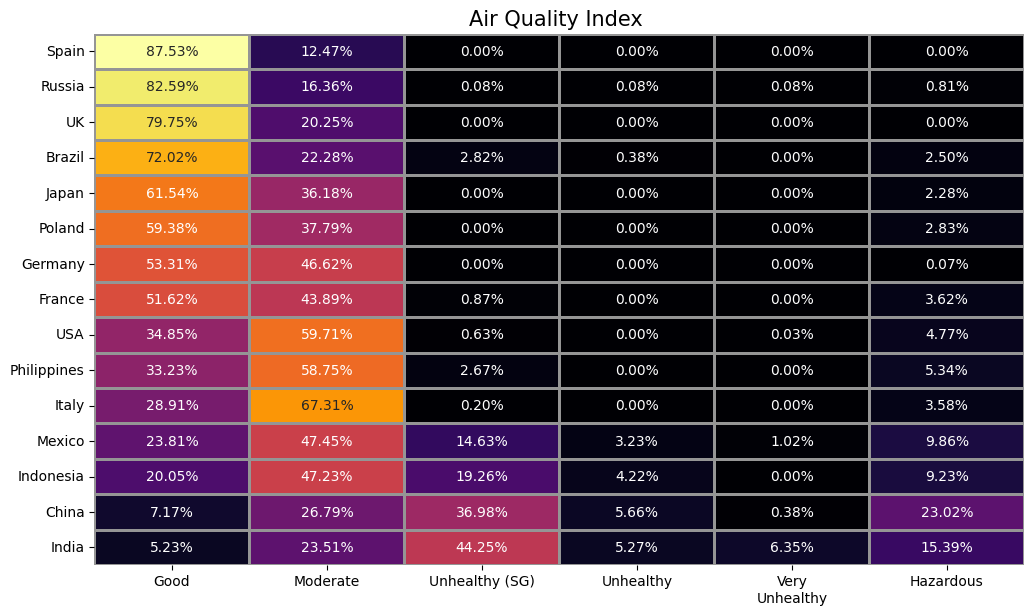

In [35]:
top_10 = (gap.groupby('Country')['AQI Category'].count().sort_values(ascending=False).head(15).index.to_list())
top_10

str_cols_list = ['AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category']

def make_heatmap_cities_per_countries_and_categories(
    list_of_countries,
    category_column,
    ylabel,
    xlabel,
    plttitle,
    palette
):
    '''
    Make heatmap based on the crosstab:
        1) create a df with selected countries only
        2) make a crosstab there:
            index = df.country (i.e. list of countries)
            columns = df.category (i.e. unique categories)
            values = df.city
            aggfunc = count
        3) visualise it as a heatmap (with all of the extra details).
    
    Args:
        list_of_countries_lst (list): list of countries to work with.
        category_column_str (str):
            pollutant categorical column ('aqi_category').
        ylabel_str (str):
            country list descriprion for Y axis label,
            for instance: 'top 10 well-represented countries\nwithin the dataset\n'
        xlabel_str (str): pollutant for X axis label ('\nair quality index (AQI)\n').
        plttitle_str (str): visualisation title.
        palette (str): colourmap ('viridis' etc.)
    
    Returns:
        Nothing.
    
    '''
    # Make a dataframe with countries selected.
    df = gap.query('Country in @list_of_countries')
    
    
    # Enumerate categories to bring some order into visualisations.
    # Work with this temporary dataset, the original one is unchanged.
    
    # str_cols_list is created in the beginning of the project
    # (non-numeric colums excluding cities and countries).

    for column in str_cols_list:
        i = 0
        for item in ['Good', 'Moderate', 'Unhealthy (SG)',
                     'Unhealthy', 'Very Unhealthy', 'Hazardous']:
            i+=1
            df.loc[df[column] == item, column] = f'{i}. {item}'
    

    fig, ax = plt.subplots(figsize=(12,6.9))
    
    # The heatmap is based on this crosstab.
    this_crosstab = pd.crosstab(
        # Count the cities per each country and category.
        index=df.Country,
        columns=df[category_column],
        values=df['City'],
        aggfunc='count',

        # Normalize by dividing all values by the sum of values
        # (over each column).
        normalize='index'
    )
    
    # Make a heatmap.
    sns.heatmap(
        this_crosstab
        # Sort values of the crosstab by the first column.
        .sort_values(by='1. Good', ascending=False),

        # Start of the heatmap's code.
        # Palette.
        cmap=palette,
        # Annotations.
        annot=True,
        fmt='.2%',
        # Edges.
        linecolor='#959595',
        linewidths=.75,
        # Colorbar is redundant.
        cbar=False
    )

    
    # Y
    plt.ylabel(ylabel)

    # X
    plt.xlabel(xlabel)
    plt.xticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
               labels=['Good', 'Moderate', 'Unhealthy (SG)',
                     'Unhealthy', 'Very\nUnhealthy', 'Hazardous'],
              rotation=360,
               ha='center')

    # Title.
    ax.set_title(plttitle,
              fontsize=15,
              loc='center')
    
    # Describe how to show nans.
    ax.patch.set(hatch='xx', edgecolor='lightgrey')

# See function defined in the beginning of this notebook.
make_heatmap_cities_per_countries_and_categories(
    list_of_countries=top_10,
    category_column='AQI Category',
    ylabel='',
    xlabel='',
    plttitle="Air Quality Index ",
    palette='inferno'
);

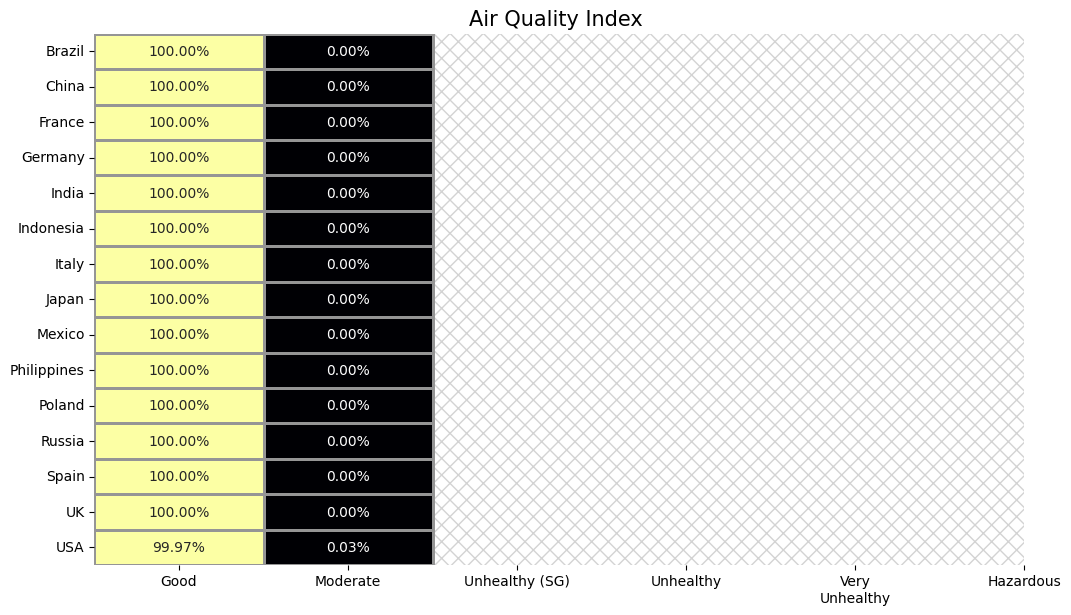

In [36]:
make_heatmap_cities_per_countries_and_categories(
    list_of_countries=top_10,
    category_column='CO AQI Category',
    ylabel='',
    xlabel='',
    plttitle="Air Quality Index ",
    palette='inferno'
);

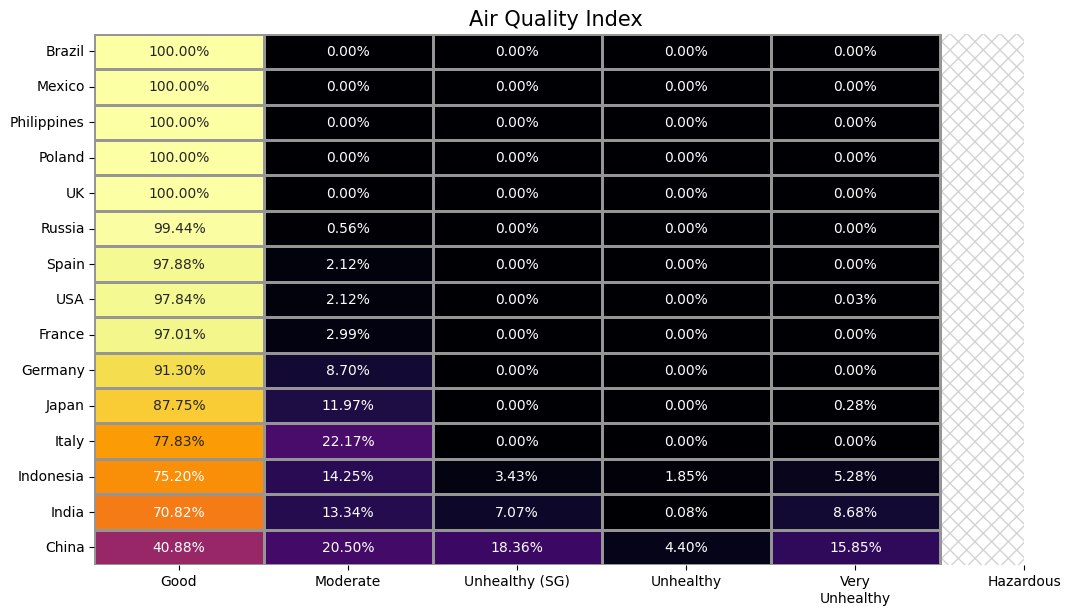

In [37]:
make_heatmap_cities_per_countries_and_categories(
    list_of_countries=top_10,
    category_column='Ozone AQI Category',
    ylabel='',
    xlabel='',
    plttitle="Air Quality Index ",
    palette='inferno'
);

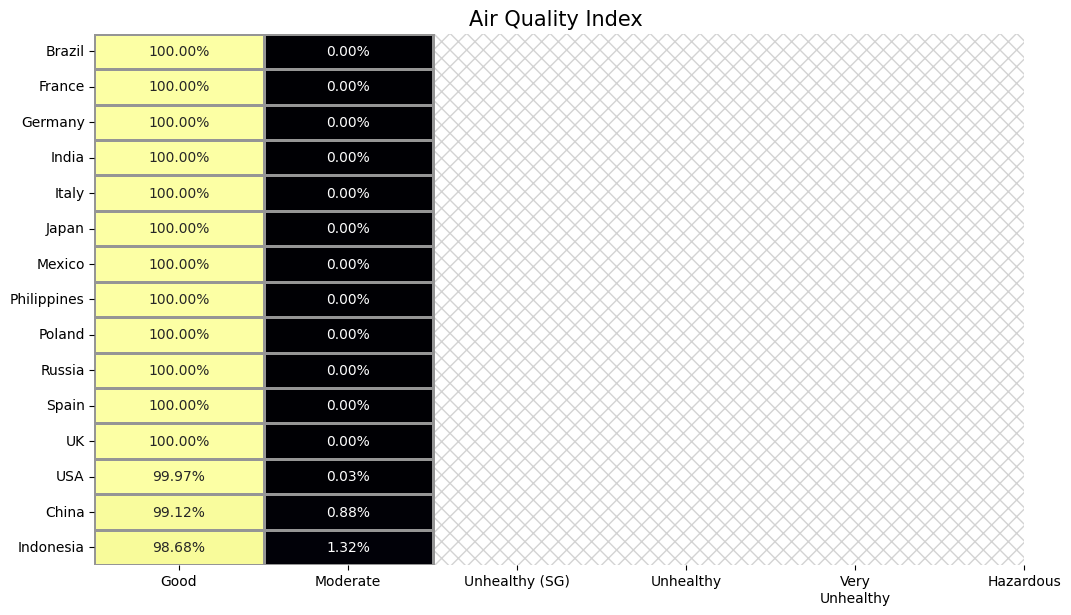

In [38]:
make_heatmap_cities_per_countries_and_categories(
    list_of_countries=top_10,
    category_column='NO2 AQI Category',
    ylabel='',
    xlabel='',
    plttitle="Air Quality Index ",
    palette='inferno'
);

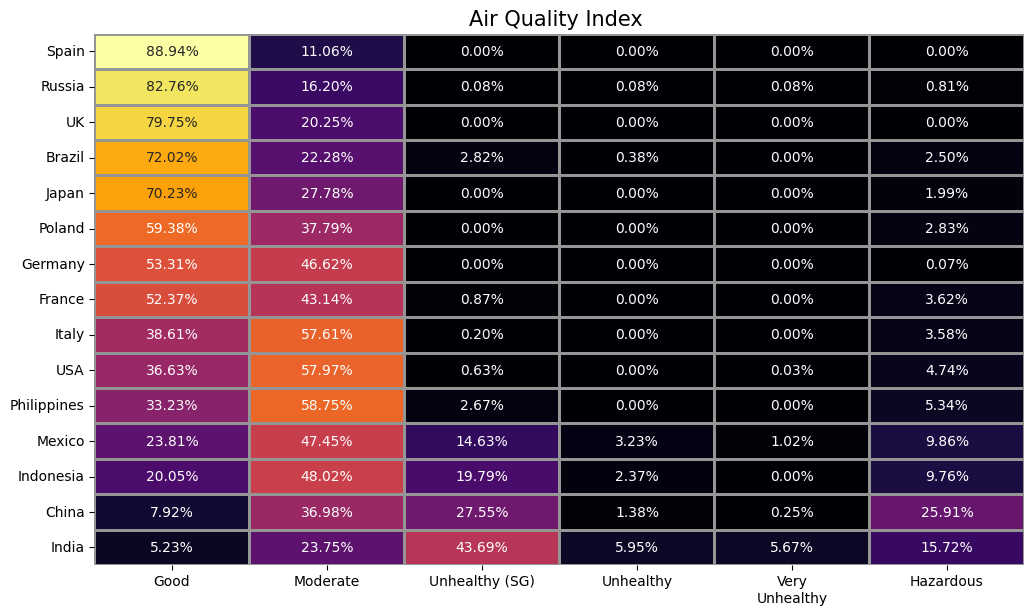

In [39]:
make_heatmap_cities_per_countries_and_categories(
    list_of_countries=top_10,
    category_column='PM2.5 AQI Category',
    ylabel='',
    xlabel='',
    plttitle="Air Quality Index ",
    palette='inferno'
);

## Managing Outliers

`Let's start by checking out the Outliers of the numerical data`

In [99]:
gap.shape

(23035, 12)

In [100]:
gap.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russia,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [101]:
# checkpoint
# gap.to_csv("global air pollution dataset cleaned.csv")

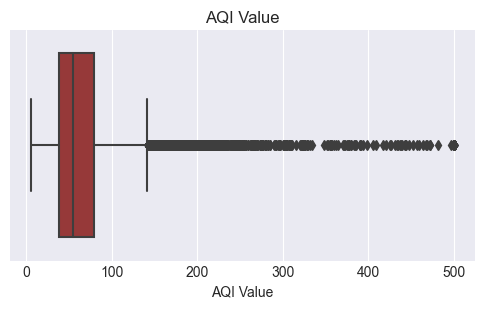

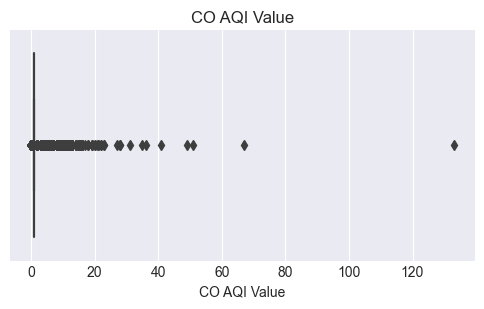

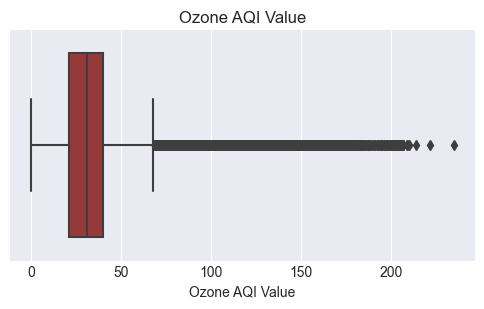

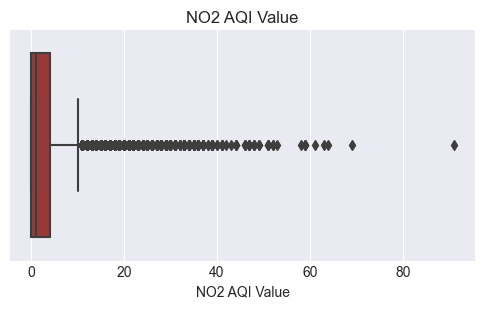

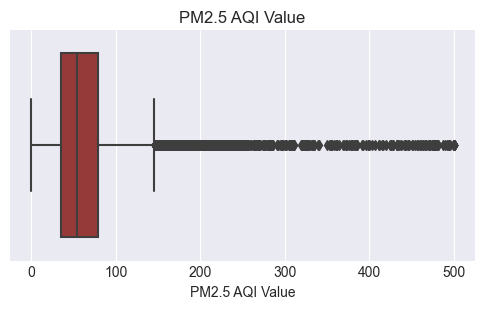

In [102]:
cols = ["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]
for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x = gap[col], color = "brown")
    plt.title(col)

`It is evident from the above visualizations that outliers do exists in our data but since we cannot consider them as outliers 
due to the data points that are too close to the whisker`

`Hence calculating the upper quartile (Q3) and the lower quartile (Q1)`

In [103]:
gap.shape

(23035, 12)

In [104]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [105]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True    
    else:
        return False

In [106]:
def grab_outliers(dataframe, col_name):
    low, up = outlier_thresholds(dataframe, col_name)
    outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
    return outlier_index

In [107]:
for col in cols:
    outlier_index = grab_outliers(gap,col) 
    percentage_outliers =  len(outlier_index)/len(gap[col])* 100
    print(f"{col}: \n{len(outlier_index)} outliers present ({percentage_outliers:.3f}%)\n")

AQI Value: 
132 outliers present (0.573%)

CO AQI Value: 
93 outliers present (0.404%)

Ozone AQI Value: 
33 outliers present (0.143%)

NO2 AQI Value: 
105 outliers present (0.456%)

PM2.5 AQI Value: 
99 outliers present (0.430%)



In [108]:
for col in cols:
    low_limit, up_limit = outlier_thresholds(gap, col)
    gap = gap[~((gap[col] < low_limit) | (gap[col] > up_limit))]

In [109]:
gap.shape

(22702, 12)

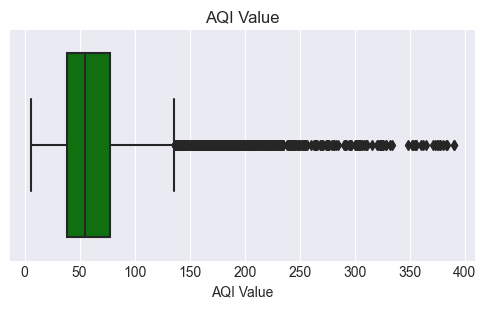

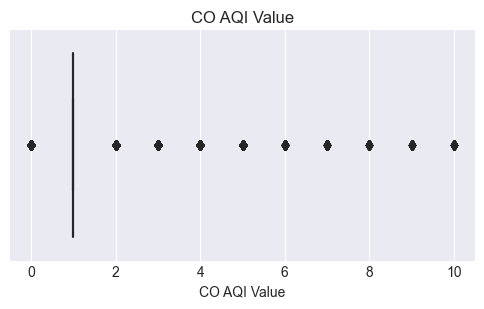

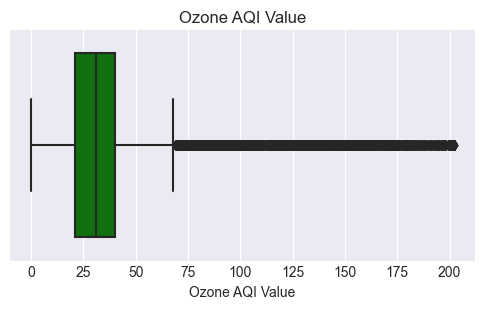

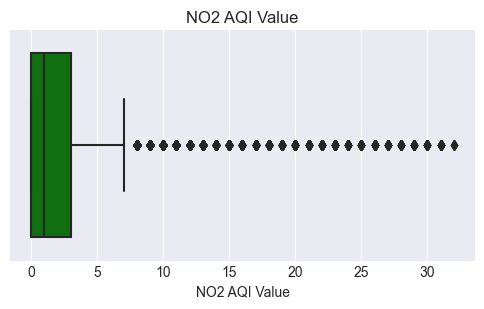

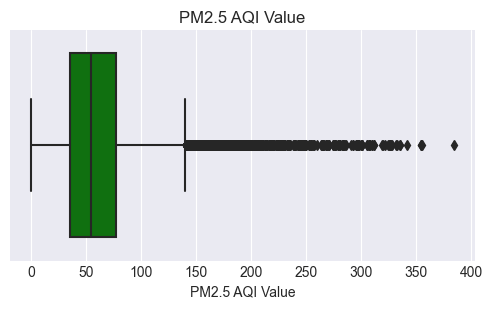

In [110]:
for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x = gap[col], color = "green")
    plt.title(col)

In [111]:
gap1 = pd.read_csv("global air pollution dataset cleaned.csv")

In [112]:
gap1.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russia,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [113]:
gap1.shape

(23035, 12)

In [114]:
gap1["CO AQI Category"].value_counts()

Good             23032
Moderate             2
Unhealthy(SG)        1
Name: CO AQI Category, dtype: int64

# One Hot Encoding

`One Hot Encoding to be done on the Categorical Variables for modeling`

In [115]:
pd.set_option("display.max_rows", None)

In [116]:
df = pd.get_dummies(data=gap1,columns=["AQI Category", "CO AQI Category", "Ozone AQI Category", "NO2 AQI Category", "PM2.5 AQI Category"])

In [117]:
df.head()

,Country,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category_Good,AQI Category_Hazardous,AQI Category_Moderate,...,Ozone AQI Category_Unhealthy(SG),Ozone AQI Category_Very Unhealthy,NO2 AQI Category_Good,NO2 AQI Category_Moderate,PM2.5 AQI Category_Good,PM2.5 AQI Category_Hazardous,PM2.5 AQI Category_Moderate,PM2.5 AQI Category_Unhealthy,PM2.5 AQI Category_Unhealthy(SG),PM2.5 AQI Category_Very Unhealthy
0,Russia,Praskoveya,51,1,36,0,51,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,Brazil,Presidente Dutra,41,1,5,1,41,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,Italy,Priolo Gargallo,66,1,39,2,66,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,Poland,Przasnysz,34,1,34,0,20,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,France,Punaauia,22,0,22,0,6,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [118]:
df.shape

(23035, 29)

## Test for Normality

In [119]:
colns = ["AQI Value","CO AQI Value","Ozone AQI Value","NO2 AQI Value"]
for i in colns:
    print(f'{i}: {"Not Gaussian" if kstest(df[i].values,"norm")[1]<0.05 else "Gaussian"}  {kstest(df[i].values,"norm")}')

AQI Value: Not Gaussian  KstestResult(statistic=0.9999999990134123, pvalue=0.0)
CO AQI Value: Not Gaussian  KstestResult(statistic=0.710760851994308, pvalue=0.0)
Ozone AQI Value: Not Gaussian  KstestResult(statistic=0.9836294811739267, pvalue=0.0)
NO2 AQI Value: Not Gaussian  KstestResult(statistic=0.5, pvalue=0.0)


# Prediction

In [120]:
# standardizing the columns
"""scaled = df.copy()

col_names = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']
features = scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled[col_names] = features
scaled.head()"""

"scaled = df.copy()\n\ncol_names = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']\nfeatures = scaled[col_names]\nscaler = StandardScaler().fit(features.values)\nfeatures = scaler.transform(features.values)\n\nscaled[col_names] = features\nscaled.head()"

In [121]:
df.head()

,Country,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category_Good,AQI Category_Hazardous,AQI Category_Moderate,...,Ozone AQI Category_Unhealthy(SG),Ozone AQI Category_Very Unhealthy,NO2 AQI Category_Good,NO2 AQI Category_Moderate,PM2.5 AQI Category_Good,PM2.5 AQI Category_Hazardous,PM2.5 AQI Category_Moderate,PM2.5 AQI Category_Unhealthy,PM2.5 AQI Category_Unhealthy(SG),PM2.5 AQI Category_Very Unhealthy
0,Russia,Praskoveya,51,1,36,0,51,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,Brazil,Presidente Dutra,41,1,5,1,41,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,Italy,Priolo Gargallo,66,1,39,2,66,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,Poland,Przasnysz,34,1,34,0,20,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,France,Punaauia,22,0,22,0,6,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [122]:
df.shape

(23035, 29)

In [123]:
drop_cols = ["Country","City","AQI Value"]
X = df.drop(drop_cols, axis=1)
y = df['AQI Value']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

In [124]:
X.head()

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category_Good,AQI Category_Hazardous,AQI Category_Moderate,AQI Category_Unhealthy,AQI Category_Unhealthy(SG),AQI Category_Very Unhealthy,...,Ozone AQI Category_Unhealthy(SG),Ozone AQI Category_Very Unhealthy,NO2 AQI Category_Good,NO2 AQI Category_Moderate,PM2.5 AQI Category_Good,PM2.5 AQI Category_Hazardous,PM2.5 AQI Category_Moderate,PM2.5 AQI Category_Unhealthy,PM2.5 AQI Category_Unhealthy(SG),PM2.5 AQI Category_Very Unhealthy
0,1,36,0,51,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,5,1,41,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,39,2,66,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,34,0,20,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,22,0,6,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [125]:
y.head()

0    51
1    41
2    66
3    34
4    22
Name: AQI Value, dtype: int64

In [126]:
# linear regression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

In [127]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-Squared: ", r2)

MAE:  3.7538381736972903
MSE:  35.326627799201844
RMSE:  5.943620765089395
R-Squared:  0.9889458227549026


# Clustering

`Clustering Countries on the basis of AQI Levels`

In [128]:
df.head()

,Country,City,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category_Good,AQI Category_Hazardous,AQI Category_Moderate,...,Ozone AQI Category_Unhealthy(SG),Ozone AQI Category_Very Unhealthy,NO2 AQI Category_Good,NO2 AQI Category_Moderate,PM2.5 AQI Category_Good,PM2.5 AQI Category_Hazardous,PM2.5 AQI Category_Moderate,PM2.5 AQI Category_Unhealthy,PM2.5 AQI Category_Unhealthy(SG),PM2.5 AQI Category_Very Unhealthy
0,Russia,Praskoveya,51,1,36,0,51,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,Brazil,Presidente Dutra,41,1,5,1,41,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,Italy,Priolo Gargallo,66,1,39,2,66,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,Poland,Przasnysz,34,1,34,0,20,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4,France,Punaauia,22,0,22,0,6,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [129]:
data_pol=df.groupby('Country',as_index=False)[['CO AQI Value','Ozone AQI Value','NO2 AQI Value','PM2.5 AQI Value']].agg(np.sum)

In [130]:
data_pol.head()

,Country,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,Afghanistan,29,1969,1,4700
1,Albania,32,1346,23,2179
2,Algeria,23,566,112,963
3,Andorra,2,88,0,66
4,Angola,85,613,51,2212


In [131]:
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_num=data_pol.drop("Country",axis=1)
data_scaled=data_num.apply(scale,axis=1)

In [132]:
Z=linkage(data_scaled,method="ward")

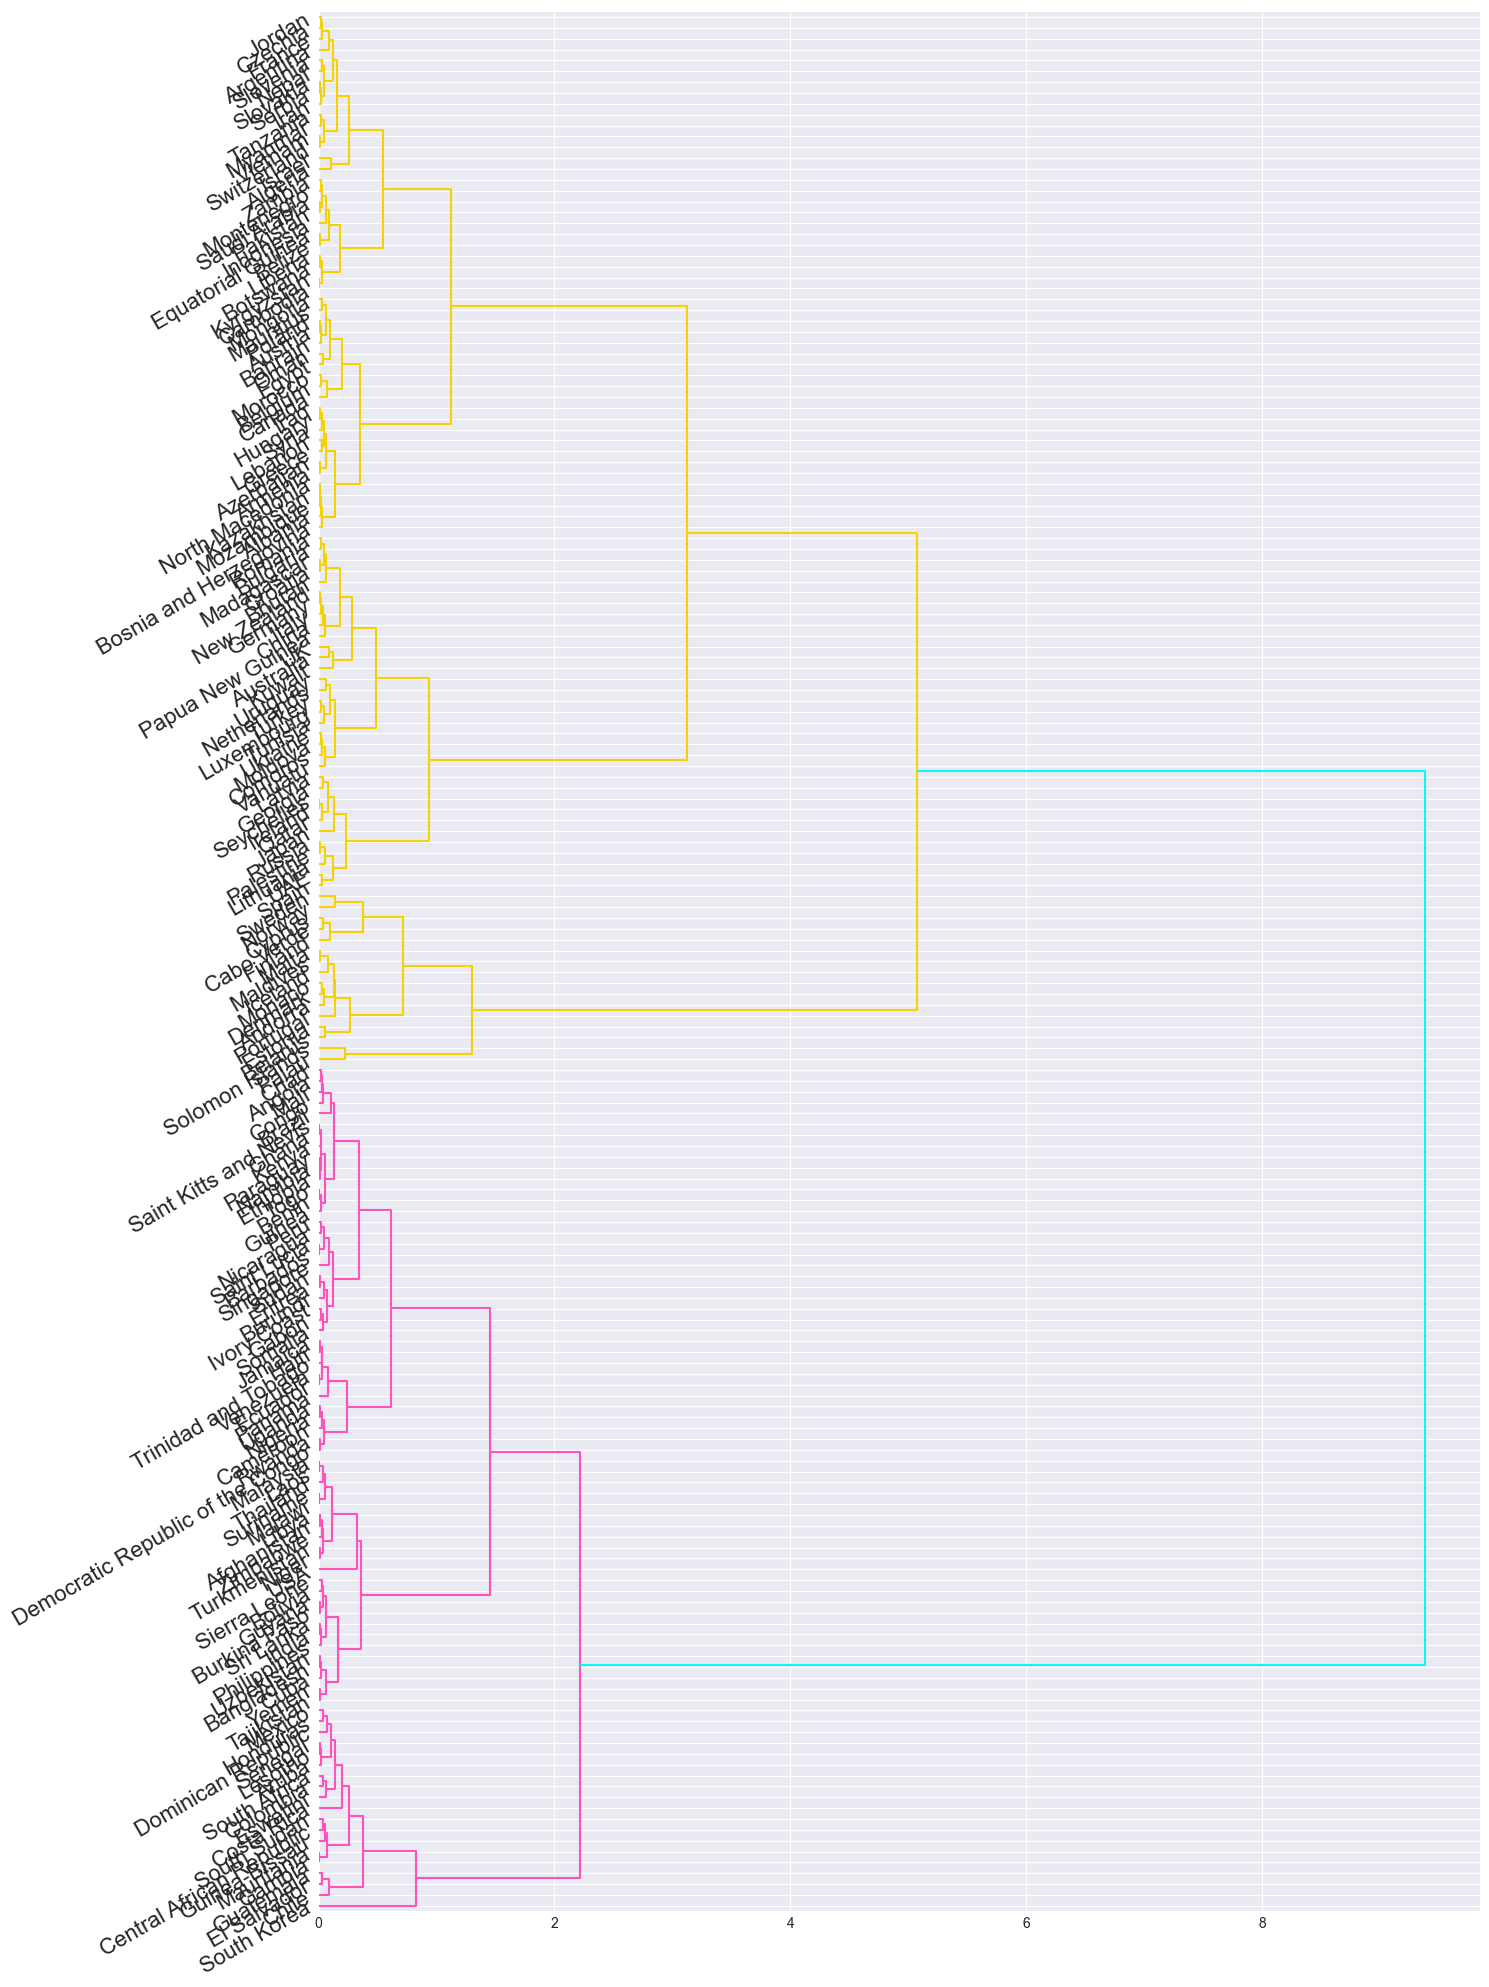

In [133]:
fig, ax = plt.subplots(figsize=(15, 20))
ax=dendrogram(Z,orientation="right",labels=np.array(data_pol['Country']),leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()

> **Ensure Proper Country Names**

> **Top 10 Countries having high AQI Value**

> **Top 10 Countries having low AQI Values**

> **High AQI Levels in India and Why?**

> **Low AQI Levels in India and Why?**

## Ideas

> **Create a new feature called "Continent" to analyse the AQI Quality on each Continent**